# Introduction à l'exploration intéractive de données avec Python et Pandas

Auteur: Valentin Barriere

Objectif: Comprendre le contenu des données, la structure, les problèmes (données manquantes / aberrantes)

Inspiré des travaux d'Alexandre Gramfort

### Les données:

MovieLens 1M Data Set contient les notes attribuées à des films par des utilisateurs du site Movielens. Les données sont fournies, mais peuvent être trouvées, si besoin, à l'adresse: http://grouplens.org/datasets/movielens/

### Chargement de packages utiles

In [1]:
import pandas as pd  #pour l'exploration de données
import numpy as np   #pour les operations numeriques (type Matlab)

### Lire les données "users" dans un DataFrame Pandas

In [2]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('ml-1m/users.dat', sep='::', header=None, names=unames, engine='python')

In [4]:
users.head() # head() permet de n'afficher que les premieres lignes pour la visualisation

user_id gender  age  occupation    zip
0        1      F    1          10  48067
1        2      M   56          16  70072
2        3      M   25          15  55117
3        4      M   45           7  02460
4        5      M   25          20  55455

### Lire les données "rating" dans un DataFrame Pandas

In [5]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ml-1m/ratings.dat', sep='::', header=None, names=rnames, engine='python')

In [6]:
ratings.head(10)

user_id  movie_id  rating  timestamp
0        1      1193       5  978300760
1        1       661       3  978302109
2        1       914       3  978301968
3        1      3408       4  978300275
4        1      2355       5  978824291
5        1      1197       3  978302268
6        1      1287       5  978302039
7        1      2804       5  978300719
8        1       594       4  978302268
9        1       919       4  978301368

### Lire les données sur les films  dans un  Data Frame Pandas

In [7]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ml-1m/movies.dat', sep='::', header=None, names=mnames, engine='python')

In [8]:
movies.head(10)

movie_id                               title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy
5         6                         Heat (1995)         Action|Crime|Thriller
6         7                      Sabrina (1995)                Comedy|Romance
7         8                 Tom and Huck (1995)          Adventure|Children's
8         9                 Sudden Death (1995)                        Action
9        10                    GoldenEye (1995)     Action|Adventure|Thriller

### Fusion des données en un seul DataFrame

In [9]:
data = pd.merge(pd.merge(ratings, users), movies)

In [10]:
data.head() #head() permet de n'afficher que les premieres lignes pour la visualisation

user_id  movie_id  rating  timestamp gender  age  occupation    zip  \
0        1      1193       5  978300760      F    1          10  48067   
1        2      1193       5  978298413      M   56          16  70072   
2       12      1193       4  978220179      M   25          12  32793   
3       15      1193       4  978199279      M   25           7  22903   
4       17      1193       5  978158471      M   50           1  95350   

                                    title genres  
0  One Flew Over the Cuckoo's Nest (1975)  Drama  
1  One Flew Over the Cuckoo's Nest (1975)  Drama  
2  One Flew Over the Cuckoo's Nest (1975)  Drama  
3  One Flew Over the Cuckoo's Nest (1975)  Drama  
4  One Flew Over the Cuckoo's Nest (1975)  Drama

In [18]:
len(data)

1000209

# Explorons !

### Question 0 : Les bases 

Combien de notes as-t-on dans la base de données ? Est-ce une majorité d'homme ou de femme ? Quel est l'age moyen et la variance ? 

Ecrire une fonction qui print la somme et la moyenne d'un `pandas.Series` de type `bool`

In [ ]:
len(data)

In [68]:
dfem = data.gender == 'F'
dfem.head(10)

0     True
1    False
2    False
3    False
4    False
5     True
6    False
7     True
8     True
9    False
Name: gender, dtype: bool

In [66]:
np.sum(data.gender == 'F')

246440

In [72]:
def sum_and_mean(dbool):
    """
    Fonction pour savoir le nombre de booléen 
    """
    print 'Somme : %d ; Pourcentage : %.2f' %(np.sum(dbool), 100*np.mean(dbool))

In [73]:
sum_and_mean(data.gender == 'F')
sum_and_mean(data.gender == 'M')

Somme : 246440 ; Pourcentage : 24.64
Somme : 753769 ; Pourcentage : 75.36


In [75]:
data.age.describe()

count    1.000209e+06
mean     2.973831e+01
std      1.175198e+01
min      1.000000e+00
25%      2.500000e+01
50%      2.500000e+01
75%      3.500000e+01
max      5.600000e+01
Name: age, dtype: float64

In [76]:
np.mean(data.age == 25)

0.39547334607067125

### Question 1 : Conditions sur les booléens

Combien de films ont une note supérieure à 4.5 ? Existe-t-il une différence entre les hommes et les femmes?

In [11]:
np.sum(data['rating'] > 4.5)

226310

In [12]:
np.sum(data.rating[data.gender == 'F'] > 4.5)

58546

In [13]:
np.sum(data.rating[data.gender == 'M'] > 4.5)

167764

Attention il vaut mieux regarder les proportions pour avoir une réponse pertinente:

In [14]:
np.sum(data.rating[data.gender == 'F'] > 4.5) / float(np.sum(data.gender == 'F'))

0.23756695341665315

In [15]:
np.sum(data.rating[data.gender == 'M'] > 4.5) / float(np.sum(data.gender == 'M'))

0.22256686066951545

In [17]:
np.sum(data['rating'] > 4.5) / float(len(data))

0.22626271109338147

On verifie que c'est bien la même chose 

In [19]:
np.mean(data['rating'] > 4.5)

0.22626271109338147

### Question 2 : Operations booléennes et groupement

Combien de films ont une note médiane au dessus de 4,5 parmis les hommes de plus de 30 ans? parmis les femmes de plus de 30 ans?

In [22]:
tmp = data[(data.gender == 'M') & (data.age >= 30)].groupby('movie_id', axis=0)
tmp['rating'].median()

movie_id
1       4.0
2       3.0
3       3.0
4       3.0
5       3.0
6       4.0
7       3.0
8       3.0
9       4.0
10      4.0
11      4.0
12      2.0
13      4.0
14      4.0
15      3.0
16      4.0
17      4.0
18      3.0
19      2.0
20      3.0
21      4.0
22      3.0
23      3.0
24      3.0
25      4.0
26      4.0
27      3.0
28      4.0
29      4.0
30      3.5
       ... 
3922    2.0
3923    3.0
3924    3.0
3925    4.0
3926    3.0
3927    4.0
3928    4.0
3929    4.0
3930    3.0
3931    2.0
3932    4.0
3933    3.0
3934    3.0
3935    3.0
3936    4.0
3937    3.0
3938    1.0
3939    1.5
3940    1.0
3941    2.0
3942    2.5
3943    3.0
3945    1.0
3946    2.5
3947    4.0
3948    4.0
3949    4.0
3950    4.0
3951    4.0
3952    4.0
Name: rating, Length: 3550, dtype: float64

In [23]:
np.sum(data[(data.gender == 'M') & (data.age >= 30)].groupby('movie_id', axis=0)['rating'].median() >= 4.5)

105

In [24]:
np.sum(data[(data.gender == 'F') & (data.age >= 30)].groupby('movie_id', axis=0)['rating'].median() >= 4.5)

187

In [25]:
np.mean(data[(data.gender == 'M') & (data.age >= 30)].groupby('movie_id', axis=0)['rating'].median() >= 4.5)

0.029577464788732393

In [26]:
np.mean(data[(data.gender == 'F') & (data.age >= 30)].groupby('movie_id', axis=0)['rating'].median() >= 4.5)

0.05702958218969198

### Question 3 : Faire attention à la taille des données

Quelles sont les films les plus populaires?

In [27]:
data.groupby('movie_id', axis=0)['rating'].mean().nlargest(15)

movie_id
787     5.000000
989     5.000000
1830    5.000000
3172    5.000000
3233    5.000000
3280    5.000000
3382    5.000000
3607    5.000000
3656    5.000000
3881    5.000000
3245    4.800000
53      4.750000
2503    4.666667
2905    4.608696
2019    4.560510
Name: rating, dtype: float64

In [28]:
data[data.movie_id == 787]

user_id  movie_id  rating  timestamp gender  age  occupation    zip  \
965717      149       787       5  977325719      M   25           1  29205   
965718     2825       787       5  972610193      F   25          20  94014   
965719     2872       787       5  972423586      M   25          20  94014   

                                     title       genres  
965717  Gate of Heavenly Peace, The (1995)  Documentary  
965718  Gate of Heavenly Peace, The (1995)  Documentary  
965719  Gate of Heavenly Peace, The (1995)  Documentary

Il y a un effet taille certain... ici seul trois personnes ont noté le meilleur film. Maintenant regardons ceux qui sont "suffisament" populaires:

In [29]:
data.groupby('movie_id', axis=0)['rating'].count().head()

movie_id
1    2077
2     701
3     478
4     170
5     296
Name: rating, dtype: int64

In [30]:
data2 = pd.concat([data.groupby('movie_id', axis=0)['rating'].mean(),
                   data.groupby('movie_id', axis=0)['rating'].count()], axis=1)
data2.columns = ['mean_rating', 'n_rating']
data2.head()

mean_rating  n_rating
movie_id                       
1            4.146846      2077
2            3.201141       701
3            3.016736       478
4            2.729412       170
5            3.006757       296

On va definir une popularité minimale (en fonction du nombre de notes obtenues), et garder uniquement les films qui sont au dessus d'un tel seuil. 

In [32]:
seuil_pop = 2500
data2[data2.n_rating > seuil_pop].sort_values('mean_rating', ascending=False).head()

mean_rating  n_rating
movie_id                       
1198         4.477725      2514
260          4.453694      2991
593          4.351823      2578
2028         4.337354      2653
2858         4.317386      3428

In [34]:
(data[data['movie_id'] == 1198]['title']).head(1)

133407    Raiders of the Lost Ark (1981)
Name: title, dtype: object

In [40]:
(data[data['movie_id'] == 593]['title']).head(1)

135921    Silence of the Lambs, The (1991)
Name: title, dtype: object

Quel est  le film le plus souvent noté par les utilisateurs? 

In [38]:
data2.sort_values('n_rating', ascending=False).head(1)  # On trie le dataFrame selon n_rating pour cela

mean_rating  n_rating
movie_id                       
2858         4.317386      3428

In [39]:
(data[data['movie_id'] == 2858]['title']).head(1)

107009    American Beauty (1999)
Name: title, dtype: object

# Visualisation des données

In [41]:
# commande pour visualiser des figures dans le notebook
%matplotlib inline 

### Question 4a : Histogramme

Afficher l'histogramme des notes de tous les films?

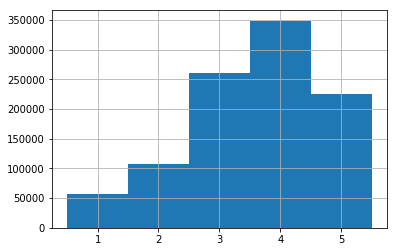

In [42]:
data.rating.hist(bins=5, align='left', range=[1, 6])

### Question 4b : Histogramme

Afficher l'histogramme du nombre de notes reçues par chaque film

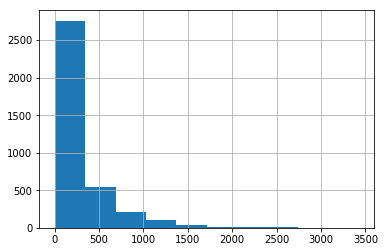

In [43]:
data.groupby('movie_id', axis=0)['rating'].count().hist(bins=10)

### Question 5 : Dépendances

Afficher l'histogramme des notes moyennes des films. 

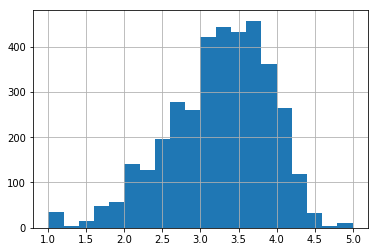

In [44]:
data.groupby('movie_id', axis=0)['rating'].mean().hist(bins=20)

La distribution des notes dépent-elle du sexe?

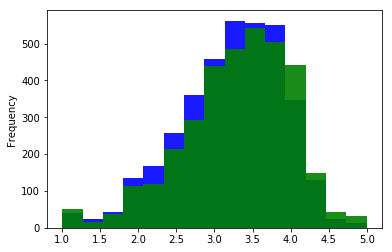

In [45]:
data[data.gender == 'M'].groupby('movie_id', axis=0)['rating'].mean().plot(kind='hist', alpha=0.9, color='b', bins=15)
data[data.gender == 'F'].groupby('movie_id', axis=0)['rating'].mean().plot(kind='hist', alpha=0.9, color='g', bins=15)

### Question 6 : Estimation de la densité

Afficher l'histogramme des notes des films qui ont été notés plus de seuil_pop = 30 fois.

In [46]:
data.head(3)

user_id  movie_id  rating  timestamp gender  age  occupation    zip  \
0        1      1193       5  978300760      F    1          10  48067   
1        2      1193       5  978298413      M   56          16  70072   
2       12      1193       4  978220179      M   25          12  32793   

                                    title genres  
0  One Flew Over the Cuckoo's Nest (1975)  Drama  
1  One Flew Over the Cuckoo's Nest (1975)  Drama  
2  One Flew Over the Cuckoo's Nest (1975)  Drama

In [47]:
map_id_to_count = data.groupby('movie_id')['rating'].count().to_dict()
data['movie_count'] = data['movie_id'].map(map_id_to_count)   # rajoute une variable comptant le nombre de votes par film

In [48]:
data.head(3)

user_id  movie_id  rating  timestamp gender  age  occupation    zip  \
0        1      1193       5  978300760      F    1          10  48067   
1        2      1193       5  978298413      M   56          16  70072   
2       12      1193       4  978220179      M   25          12  32793   

                                    title genres  movie_count  
0  One Flew Over the Cuckoo's Nest (1975)  Drama         1725  
1  One Flew Over the Cuckoo's Nest (1975)  Drama         1725  
2  One Flew Over the Cuckoo's Nest (1975)  Drama         1725

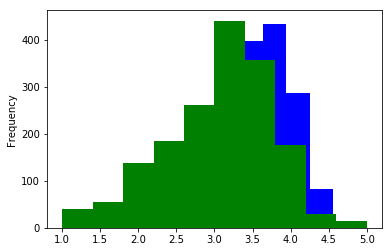

In [77]:
# changer kde par hist pour retrouver un histogramme et non une estimation de la densite
data[data.movie_count >= seuil_pop].groupby('movie_id', axis=0)['rating'].mean().plot(kind='hist', color='b')
data[data.movie_count <= seuil_pop].groupby('movie_id', axis=0)['rating'].mean().plot(kind='hist', color='g')

Maintenant la densité. 

Pour rappel la densité $f_d$ est telle que $P(X<x) = \int_{-\infty}^{x} f_d(x') \, \mathrm{d}x'$

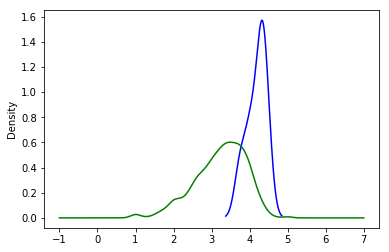

In [49]:
# changer kde par hist pour retrouver un histogramme et non une estimation de la densite
data[data.movie_count >= seuil_pop].groupby('movie_id', axis=0)['rating'].mean().plot(kind='kde', color='b')
data[data.movie_count <= seuil_pop].groupby('movie_id', axis=0)['rating'].mean().plot(kind='kde', color='g')

### Question 7 : Scatter plot

Afficher un "scatter plot" des notes moyennes pour les hommes contre les notes des femmes pour chaque film (notés plus de seuil_pop = 100 fois).

In [50]:
seuil_pop = 100
data_popular = data[data.movie_count >= seuil_pop]
mean_ratings = data_popular.pivot_table(values='rating', index='title',
                                columns='gender', aggfunc='mean')

In [52]:
mean_ratings.sort_values('F', ascending=False).head(10) #top 10 féminin

gender                                                     F         M
title                                                                 
Close Shave, A (1995)                               4.644444  4.473795
Wrong Trousers, The (1993)                          4.588235  4.478261
General, The (1927)                                 4.575758  4.329480
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)       4.572650  4.464589
Wallace & Gromit: The Best of Aardman Animation...  4.563107  4.385075
Schindler's List (1993)                             4.562602  4.491415
Grand Illusion (Grande illusion, La) (1937)         4.560976  4.266129
Shawshank Redemption, The (1994)                    4.539075  4.560625
Grand Day Out, A (1992)                             4.537879  4.293255
To Kill a Mockingbird (1962)                        4.536667  4.372611

In [53]:
mean_ratings.sort_values('M', ascending=False).head(10) #top 10 masculin

gender                                                     F         M
title                                                                 
Godfather, The (1972)                               4.314700  4.583333
Seven Samurai (The Magnificent Seven) (Shichini...  4.481132  4.576628
Shawshank Redemption, The (1994)                    4.539075  4.560625
Raiders of the Lost Ark (1981)                      4.332168  4.520597
Usual Suspects, The (1995)                          4.513317  4.518248
Star Wars: Episode IV - A New Hope (1977)           4.302937  4.495307
Schindler's List (1993)                             4.562602  4.491415
Paths of Glory (1957)                               4.392857  4.485149
Wrong Trousers, The (1993)                          4.588235  4.478261
Close Shave, A (1995)                               4.644444  4.473795

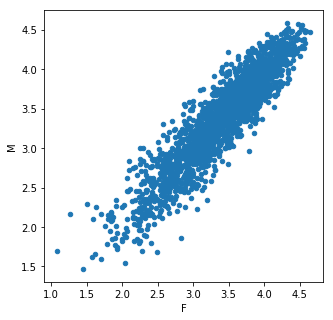

In [54]:
mean_ratings.plot(x='F', y='M', kind='scatter', figsize=(5,5))

### Question 8 : Anomalies

Afficher un "scatter plot" des notes moyennes des hommes vs les femmes pour chaque film noté moins de seuil_pop = 100 fois.

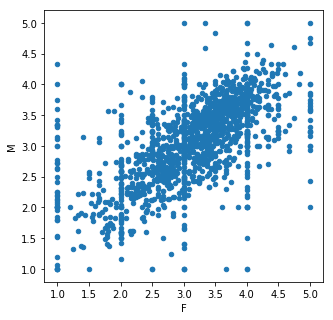

In [55]:
data_not_popular = data[data.movie_count <= seuil_pop]
mean_ratings_not_popular = data_not_popular.pivot_table(values='rating', index='title',
                                columns='gender', aggfunc='mean')
mean_ratings_not_popular.plot(x='F', y='M', kind='scatter', figsize=(5,5))

### Question ouverte : Interprétation
Quel disparité de comportement observe-t-on entre les hommes et les femmes d’après la dernière figure?

On peut observer des lignes verticales : cela signifie que pour certains films auquels les femmes donnaient les mêmes notes, les hommes ont données des notes très différentes. 

Il n'y a pas de lignes horozontales, 

Peut être qu'il y a plus de chiffres rond aussi parce que les femmes 

Les femmes sont plus constantes que les hommes en terme de notation. 

In [59]:
mean_ratings_not_popular.head(10)

gender                                              F         M
title                                                          
$1,000,000 Duck (1971)                       3.375000  2.761905
'Night Mother (1986)                         3.388889  3.352941
'Til There Was You (1997)                    2.675676  2.733333
1-900 (1994)                                 2.000000  3.000000
187 (1997)                                   2.428571  2.791667
24 7: Twenty Four Seven (1997)               5.000000  3.750000
24-hour Woman (1998)                         2.000000  1.600000
3 Ninjas: High Noon On Mega Mountain (1998)  1.400000  1.351351
3 Strikes (2000)                                  NaN  2.750000
301, 302 (1995)                              3.000000  2.857143

In [60]:
mean_ratings_not_popular[mean_ratings_not_popular.F.isin([1, 2, 3, 4, 5])]

gender                                                F         M
title                                                            
1-900 (1994)                                        2.0  3.000000
24 7: Twenty Four Seven (1997)                      5.0  3.750000
24-hour Woman (1998)                                2.0  1.600000
301, 302 (1995)                                     3.0  2.857143
Abominable Snowman, The (1957)                      2.0  2.750000
Acid House, The (1998)                              4.0  2.200000
Actor's Revenge, An (Yukinojo Henge) (1963)         3.0  3.333333
Adrenalin: Fear the Rush (1996)                     2.0  1.500000
Adventures of Pinocchio, The (1996)                 3.0  2.868421
Aiqing wansui (1994)                                3.0       NaN
Alan Smithee Film: Burn Hollywood Burn, An (1997)   1.0  2.062500
Algiers (1938)                                      4.0  3.555556
Alien Escape (1995)                                 1.0  2.722222
All the Rage (a.k.a. It's the Rage) (1999)          3.0  3.363636
Alley Cats, The (1968)                              4.0       NaN
Allnighter, The (1987)                              3.0  1.666667
Almost Heroes (1998)                                2.0  2.591837
Amityville: A New Generation (1993)                 2.0  1.578947
Amityville: Dollhouse (1996)                        2.0  1.562500
Anatomy (Anatomie) (2000)                           3.0  2.571429
And the Ship Sails On (E la nave va) (1984)         4.0  3.166667
Angela (1995)                                       3.0  5.000000
Anna (1996)                                         4.0       NaN
Ape, The (1940)                                     2.0  2.222222
Assassination (1987)                                4.0  2.863636
Avalanche (1978)                                    3.0  2.466667
Ayn Rand: A Sense of Life (1997)                    5.0  4.000000
B. Monkey (1998)                                    3.0  3.600000
Bad Moon (1996)                                     3.0  2.000000
Ballad of Narayama, The (Narayama Bushiko) (1958)   5.0  3.428571
...                                                 ...       ...
Time Masters (Les Ma�tres du Temps) (1982)          1.0  2.714286
Time Regained (Le Temps Retrouv�) (1999)            2.0  3.388889
Time Tracers (1995)                                 2.0  1.166667
To Have, or Not (1995)                              4.0  2.000000
Tomb of Ligeia, The (1965)                          3.0  2.428571
Torso (Corpi Presentano Tracce di Violenza Carn...  1.0  1.000000
Touch (1997)                                        3.0  2.818182
Toxic Avenger Part III: The Last Temptation of ...  1.0  1.843137
Trippin' (1999)                                     4.0  2.333333
Truce, The (1996)                                   1.0  3.000000
Turn It Up (2000)                                   2.0  1.600000
Twice Upon a Yesterday (1998)                       5.0  3.222222
Two Bits (1995)                                     2.0  3.666667
Two Much (1996)                                     3.0  1.400000
Two or Three Things I Know About Her (1966)         4.0  3.333333
Under Capricorn (1949)                              2.0  2.571429
Unhook the Stars (1996)                             3.0  3.375000
Walk in the Sun, A (1945)                           4.0  4.000000
Wanted: Dead or Alive (1987)                        4.0  3.193548
What Happened Was... (1994)                         3.0  3.296296
Whatever Happened to Aunt Alice? (1969)             4.0  2.727273
White Sands (1992)                                  3.0  3.148649
Window to Paris (1994)                              4.0  4.666667
Winter Guest, The (1997)                            3.0  3.500000
Wirey Spindell (1999)                               1.0  1.000000
Wisdom of Crocodiles, The (a.k.a. Immortality) ...  3.0  3.500000
Woman of Paris, A (1923)                            5.0  2.428571
Yankee Zulu (1994)                      

In [62]:
tmp = data_not_popular.pivot_table(values='rating', index='title',
                                columns='gender', aggfunc='count')
tmp.head()

gender                                                 F     M
title                                                         
$1,000,000 Duck (1971)                              16.0  21.0
'Night Mother (1986)                                36.0  34.0
'Til There Was You (1997)                           37.0  15.0
1-900 (1994)                                         1.0   1.0
187 (1997)                                           7.0  48.0
24 7: Twenty Four Seven (1997)                       1.0   4.0
24-hour Woman (1998)                                 4.0   5.0
3 Ninjas: High Noon On Mega Mountain (1998)         10.0  37.0
3 Strikes (2000)                                     NaN   4.0
301, 302 (1995)                                      2.0   7.0
42 Up (1998)                                        30.0  58.0
8 1/2 Women (1999)                                   7.0  42.0
8 Seconds (1994)                                    26.0  46.0
A Chef in Love (1996)                                7.0  17.0
Abominable Snowman, The (1957)                       1.0   8.0
About Adam (2000)                                    8.0  12.0
Above the Rim (1994)                                 6.0  43.0
Acid House, The (1998)                               2.0   5.0
Across the Sea of Time (1995)                        3.0   5.0
Actor's Revenge, An (Yukinojo Henge) (1963)          1.0   6.0
Addiction, The (1995)                               21.0  48.0
Adrenalin: Fear the Rush (1996)                      1.0  10.0
Adventures of Elmo in Grouchland, The (1999)        12.0  21.0
Adventures of Pinocchio, The (1996)                 16.0  38.0
Adventures of Sebastian Cole, The (1998)            14.0  19.0
Affair of Love, An (Une Liaison Pornographique)...  19.0  20.0
Afterglow (1997)                                    40.0  42.0
Agnes Browne (1999)                                 21.0  13.0
Aim�e & Jaguar (1999)                                9.0  11.0
Aiqing wansui (1994)                                 1.0   NaN
...                                                  ...   ...
With Friends Like These... (1998)                    NaN   2.0
Withnail and I (1987)                               19.0  53.0
Without Limits (1998)                               14.0  30.0
Woman in the Dunes (Suna no onna) (1964)            28.0  49.0
Woman of Paris, A (1923)                             1.0   7.0
Woman on Top (2000)                                 25.0  44.0
Women, The (1939)                                   39.0  45.0
Wonderful, Horrible Life of Leni Riefenstahl, T...  20.0  42.0
Wonderland (1997)                                    9.0  11.0
Wonderland (1999)                                   26.0  40.0
Woo (1998)                                           3.0   8.0
Wood, The (1999)                                    22.0  65.0
Wooden Man's Bride, The (Wu Kui) (1994)              NaN   1.0
World of Apu, The (Apur Sansar) (1959)              19.0  37.0
Wrong Man, The (1956)                               27.0  71.0
X: The Unknown (1956)                                4.0   8.0
Xiu Xiu: The Sent-Down Girl (Tian yu) (1998)        28.0  41.0
Yankee Zulu (1994)                                   1.0   1.0
Yards, The (1999)                                   16.0  61.0
Year My Voice Broke, The (1987)                     10.0  17.0
Year of the Horse (1997)                             NaN   4.0
You Can't Take It With You (1938)                   26.0  51.0
You So Crazy (1994)                                  3.0  10.0
Young Doctors in Love (1982)                        13.0  66.0
Young Poisoner's Handbook, The (1995)               17.0  62.0
Young and Innocent (1937)                            2.0   8.0
Zachariah (1971)                                     NaN   2.0
Zed & Two Noughts, A (1985)                          8.0  21.0
Zero Kelvin (Kj�rlighetens kj�tere) (1995)           NaN   2.0
Zeus and Roxanne (1997)                              9.0  14.0

[1700 rows x 2 columns]

In [65]:
ddf = tmp[tmp.F<5]
np.mean(ddf.M - ddf.F)

9.5990675990675989

Il y a des films qui sont très peu notés par des femmes mais beaucoup notés par des hommes. Donc on a moins de variance côté féminin ! 